# Dignitas U.S. PayPal Donations Analytics

In [140]:
import pandas as pd

df = pd.read_excel('./data/PayPal Donations All.xlsx', sheet_name='Sheet1')
df = df.fillna('Not specified')
# print whole sheet data
df[['Date', 'Type', 'Net', 'Country']]

,Date,Type,Net,Country
0,2023-02-27,General Payment,9.70,United States
1,2023-03-03,Mobile Payment,48.50,United States
2,2023-03-06,General Payment,24.25,United States
3,2023-03-09,General Payment,3246.41,United Kingdom
4,2023-03-10,General Payment,10.11,Not specified
...,...,...,...,...
202,2023-05-05,Donation Payment,49.23,Ukraine
203,2023-05-05,Donation Payment,482.49,Switzerland
204,2023-05-05,Donation Payment,100.00,United States
205,2023-05-06,Donation Payment,1181.62,United Kingdom


## Totally raised

In [117]:
'${:,.2f}'.format(df['Net'].sum())

'$26,366.36'

Text(0.5, 1.0, 'Donations abmount distribution')

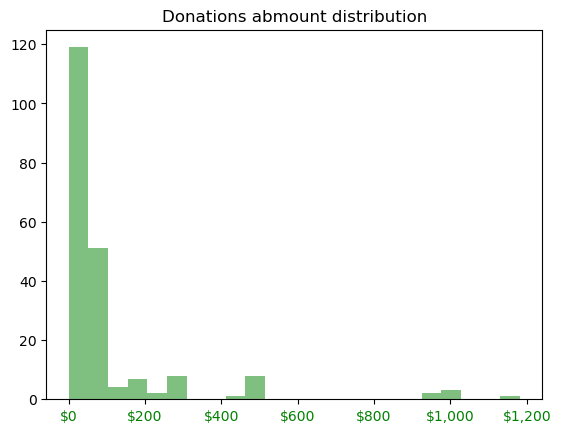

In [163]:
fig, ax = plt.subplots()
plt.hist(df[df['Net']<1200]['Net'], 
         bins = 23, 
         alpha = 0.5, 
         histtype ='stepfilled', 
         color = 'green')
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_tick_params(which='major', labelcolor='green')

plt.title('Donations amount distribution')


## Median donation amount

In [118]:
'${:,.2f}'.format(round(df['Net'].median(), 2))

'$49.22'

## Median daily donation amount

In [119]:
'${:,.2f}'.format(round(df['Net'].groupby(df['Date'].dt.to_period('D')).sum().median(), 2))

'$200.00'

## Donations by date

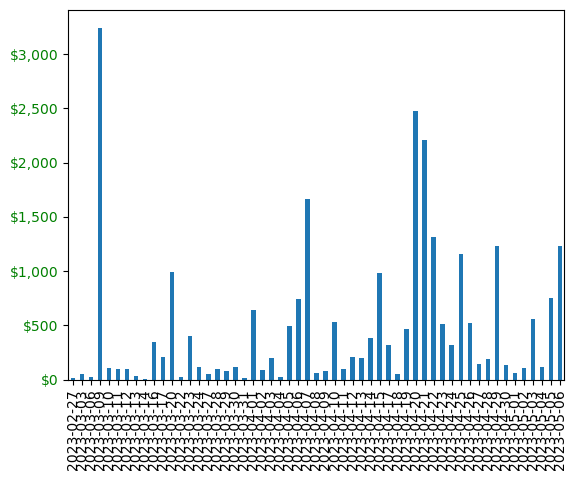

In [120]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


df['Net'].groupby(df['Date'].dt.to_period('D')).sum().plot(kind='bar', xlabel='')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## Contributions by country

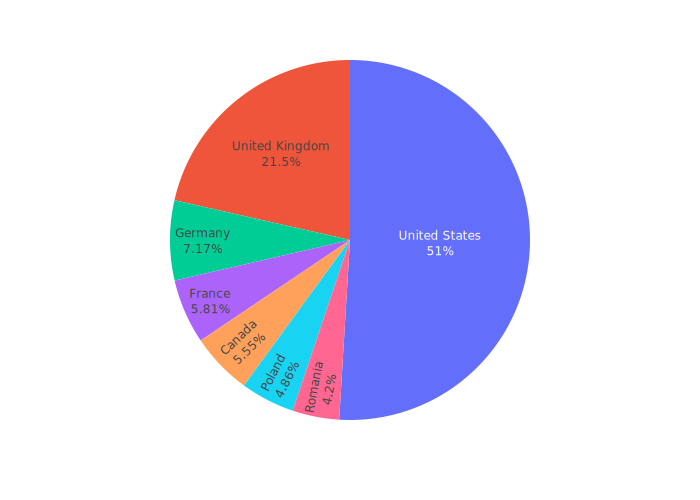

In [121]:
import plotly.io as pio
pio.renderers 
import plotly.express as px

df_country = df.groupby(df['Country'])['Net'].sum().sort_values(ascending=False).head(7).reset_index(name='Net')
fig = px.pie(df_country, values = 'Net', names = 'Country', labels = "Country")
fig.update_traces(textposition='inside', textinfo='percent+label', showlegend = False)
fig.show(renderer='svg')

## Weekly amounts

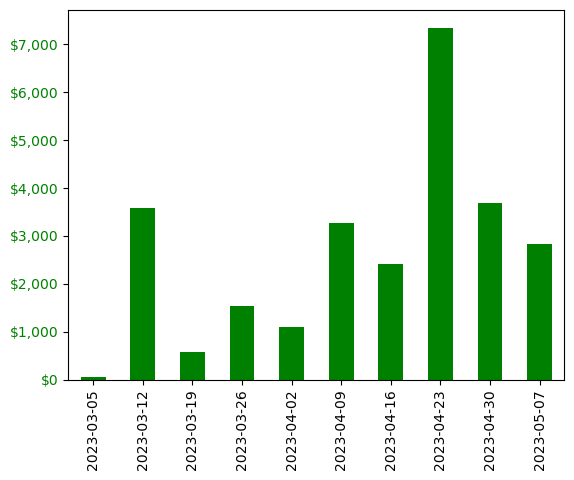

In [161]:
fig, ax = plt.subplots()
df_w = df.groupby([pd.Grouper(key='Date', freq='W')])['Net'].sum()

# remove time from datetime
df_w.index = df_w.index.date

# remove next mo data
#df_w = df_w[:-1]
df_w.plot(kind = 'bar', color = 'green')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green')
plt.show()

## Cumulatively raised

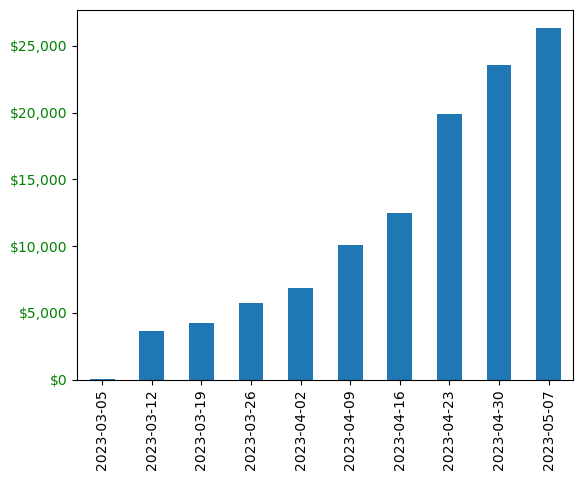

In [143]:
fig, ax = plt.subplots()

df_w.cumsum().plot(kind = 'bar')
# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## We are all united

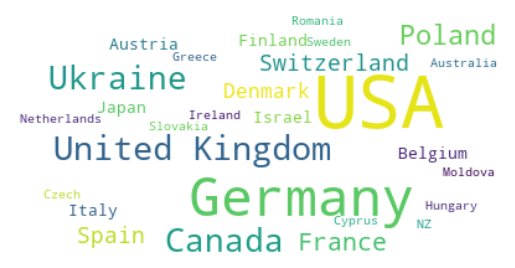

In [141]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

df['Country'] = df['Country'].replace(['United States'], 'USA')
df['Country'] = df['Country'].replace(['New Zealand'], 'NZ')
df['Country'] = df['Country'].replace(['Not specified'], '')
df['Country'] = df['Country'].replace(['Czech Republic'], 'Czech')

text = " ".join(i for i in df['Country'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
#plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Number of countries donations come from

In [126]:
df['Country'].nunique()

29

# And we have regular supporters with subscription amount

In [127]:
'${:,.2f}'.format(df.loc[df['Type'] == 'Subscription Payment', 'Net'].sum().round(2))


'$321.70'